# composite_vert_d18O_JJA

In [2]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import cartopy.crs as ccrs

In [3]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [4]:
class Site:
    def DomeC(self):
        sx=45 ; sy=59 # 75°05′59″S 123°19′56″E
        dc_lat=-73.95
        dc_lon=123.75
        return dc_lon,dc_lat,sx,sy

In [5]:
class draw_map:
    import cartopy.crs as ccrs

    def label_h(self,fig,ax,barplot,cs,levels,label,fontsize):
        import matplotlib.pyplot as plt
        cbaCorrax = fig.add_axes(barplot)
        cbar=plt.colorbar(cs, cax=cbaCorrax,orientation='horizontal',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)
        
        
    def label_v(self,fig,ax,barplot,cs,levels,label,fontsize):
        import matplotlib.pyplot as plt
        cbaCorrax = fig.add_axes(barplot)
        cbar=plt.colorbar(cs, cax=cbaCorrax,orientation='vertical',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)

In [6]:
class draw_Ant:
    def raw(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24):
        import cartopy.crs as ccrs
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, 
                             transform=ccrs.PlateCarree(),extend = "both")
        dc_lon, dc_lat,sx,sy = Site().DomeC()
        ax.scatter(dc_lon,dc_lat,c="black", s=100, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
 
        return cs

    def stream(self,ax,area,title,x,y,varu,varv, minlen=np.nan, maxlen=np.nan):
        import cartopy.crs as ccrs
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=24) 
        
        cs = ax.streamplot(x, y, varu, varv, minlength=minlen, maxlength=maxlen, \
                               color=np.sqrt(varu**2+varv**2), cmap=plt.cm.jet, \
                               density=[1, 1], linewidth=1.5, arrowsize=2,\
                               transform=ccrs.PlateCarree())
        dc_lon, dc_lat,sx,sy = Site().DomeC()
        ax.scatter(dc_lon,dc_lat,c="black", s=200, 
                       marker='^', edgecolors='white', linewidth=2, zorder=3,transform=ccrs.PlateCarree())
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
        ax.plot([dc_lon,dc_lon],[-80,-40],color="black",linestyle="solid",linewidth=2,transform=ccrs.PlateCarree())
 
        return cs
    
    def circle(self):
        import numpy as np
        import matplotlib.path as mpath
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        
        return circle 

In [7]:
def Color_Set(levels,cmapname):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mc
    cmap = plt.get_cmap(cmapname, len(levels)+1)
    colors = cmap(range(cmap.N))
    cmap, norm = mc.from_levels_and_colors(levels,colors,extend="both")
    return cmap, norm     

In [8]:
def make_colorpalet(colorname="viridis",levels=[10,30,60,70,90]):
    # https://hackmd.io/@h2tg95D2RP2ed-D8u-49Mg/S1moBqaRr
    white="#ffffff"
    lightcyan="#E0FFFF"
    paleturquoise="#AFEEEE"
    color_code=[paleturquoise,white]
    num = len(levels)-len(color_code)+1
    color_code.extend(get_color_code(colorname,num)[:])

    cmap, norm = mc.from_levels_and_colors(levels,color_code,extend="both")
    
    return cmap, norm 

def get_color_code(cname,num):
    cmap = cm.get_cmap(cname,num)

    code_list =[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
#        print(rgb2hex(rgb))
        code_list.append(rgb2hex(rgb))

    return code_list

In [9]:
loadfile  = "prcp.npz"
dataset   = np.load(loadfile)
prcp      = dataset["prcp"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y        = dataset["y"]
m        = dataset["m"]
d        = dataset["d"]

In [9]:
loadfile = "prcp_d18O_index.npz" # not maked yet!!!
dataset = np.load(loadfile)
d18O_index = dataset["index"]

In [10]:
loadfile = "uprecw.npz"
dataset = np.load(loadfile)
uprecw = dataset["uprecw"]

In [11]:
loadfile = "vprecw.npz"
dataset = np.load(loadfile)
vprecw = dataset["vprecw"]

In [12]:
thres=1

In [13]:
pmax=np.max(prcp[dc_x-1,dc_y-1,:])

prcp_p = prcp[dc_x-1,dc_y-1,d18O_index>=thres]
prcp_n = prcp[dc_x-1,dc_y-1,d18O_index<=-1*thres]
d18O_index[np.isnan(prcp[dc_x-1,dc_y-1,:])]=np.nan

prcp [:,:,prcp[dc_x-1,dc_y-1,:]==pmax]=np.nan

In [14]:
m_p = m[d18O_index>=thres]
m_m = m[d18O_index<=-1*thres]

In [15]:
uprecw_d18Op_p = uprecw[:,:,d18O_index>=thres]
uprecw_d18Op_m = uprecw[:,:,d18O_index<=-1*thres]
vprecw_d18Op_p = vprecw[:,:,d18O_index>=thres]
vprecw_d18Op_m = vprecw[:,:,d18O_index<=-1*thres]

In [16]:
uprecwJJA_d18Op_p=np.mean(uprecw_d18Op_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
uprecwJJA_d18Op_m=np.mean(uprecw_d18Op_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

In [17]:
vprecwJJA_d18Op_p=np.mean(vprecw_d18Op_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
vprecwJJA_d18Op_m=np.mean(vprecw_d18Op_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

In [18]:
loadfile ="T_d18Op_p_dc.npz"
dataset = np.load(loadfile)
T_d18Op_p_dc = dataset["T"]
lon3 = dataset["lon3"]
lat3 = dataset["lat3"]
lev3 = dataset["zlev3"]
y_p = dataset["y"]
m_p = dataset["m"]
d_p = dataset["d"]

loadfile ="T_d18Op_m_dc.npz"
dataset = np.load(loadfile)
T_d18Op_m_df = dataset["T"]
y_m = dataset["y"]
m_m = dataset["m"]
d_m = dataset["d"]

loadfile ="vq_d18Op_p_dc.npz"
dataset = np.load(loadfile)
vq_d18Op_p_df = dataset["vq"]

loadfile ="vq_d18Op_m_dc.npz"
dataset = np.load(loadfile)
vq_d18Op_m_df = dataset["vq"]

In [19]:
[tmt, jmt, kmt]  = T_d18Op_p_df.shape
latlim = 44 # -35 ~ -90
jmt=len(lat3[0,0,latlim:64])

In [20]:
# 2次元グリッド
[ygrid2, zgrid2] = np.meshgrid(lat3[0,0,latlim:64],lev3[:,0,0])
lat2v = (ygrid2.T).astype(float)
lev2 = (zgrid2.T).astype(float)

In [21]:
TJJA_d18Op_p_df=np.zeros((jmt,kmt))
TJJA_d18Op_m_df=np.zeros((jmt,kmt))
vqJJA_d18Op_p_df=np.zeros((jmt,kmt))
vqJJA_d18Op_m_df=np.zeros((jmt,kmt))
for k in range(kmt):
    TJJA_d18Op_p_df[:,k] = np.mean(T_d18Op_p_df[((m_p==6)+(m_p==7)+(m_p==8)),latlim:64,k],0)
    TJJA_d18Op_m_df[:,k] = np.mean(T_d18Op_m_df[((m_m==6)+(m_m==7)+(m_m==8)),latlim:64,k],0)
    vqJJA_d18Op_p_df[:,k] = np.mean(vq_d18Op_p_df[((m_p==6)+(m_p==7)+(m_p==8)),latlim:64,k],0)
    vqJJA_d18Op_m_df[:,k] = np.mean(vq_d18Op_m_df[((m_m==6)+(m_m==7)+(m_m==8)),latlim:64,k],0)    

In [22]:
barplot2=np.zeros((2,4))
barplot2[0,:]=[0.02, 0.1, 0.47, 0.05]
barplot2[1,:]=[0.52, 0.1, 0.47, 0.05]
barplot2h2=np.zeros((2,4))
barplot2h2[0,:]=[0.35, 0.9, 0.15, 0.03]
barplot2h2[1,:]=[0.85, 0.9, 0.15, 0.03]

In [23]:
label_n="$\mathrm{\delta^-}$"
label_p="$\mathrm{\delta^+}$"

In [24]:
T_levels = [-70,-60,-50, -40, -30, -20,  -10, 0,10,20,30]
T_label = "Air Temperature anomaly [℃]"

In [25]:
vq_levels =[-3,-2,-1,-0.5,-0.1,0.1,0.5,1,2,3]
vq_cmapname = "bwr"
vq_cmap, vq_norm = Color_Set(vq_levels, vq_cmapname)
vq_label = "Meridional Q-Flux Anomaly [g/kg $\mathsf{\cdot}$ m/s]"

In [26]:
vprecw_levels =[-50,-40,-30, -20, -10, -5,-1,0,1,5,  10, 20,30,40,50]
vprecw_cmapname = "bwr"
vprecw_cmap, vprecw_norm = Color_Set(vprecw_levels, vprecw_cmapname)
vprecw_label="Vertically Intergrated Meridional Q-flux Anomaly\n[g/kg $\mathsf{\cdot}$ m/s]"

In [27]:
qwind_levels = [0,30,60,90,120]
qwind_cmapname = "jet"
qwind_cmap, qwind_norm = Color_Set(qwind_levels, qwind_cmapname)
qwind_label="Vertically Integrated\nQ-Flux Anomaly\n[kg/kg $\mathsf{\cdot}$ m/s]"

In [28]:
class draw_vert:
    def labels(self, ax,  area,title, y, fontsize):
        y_levels=y[0,1::2].tolist()
        y_levels=[2000,3000,4000,5000,6000,7000,8000]
        ylabels= list(map(int, y_levels))
        if  area[1] == -20:
            x_levels=[-80,-60,-40,-20]
            xlabels=["S80","S60","S40","S20"]
        elif  area[1] == -35:
            x_levels=[-80,-70,-60,-50, -40]
            xlabels=["S80","S70","S60","S50","S40"]      
        elif  area[1] == -40:
            x_levels=[-80,-70, -60, -50, -40]
            xlabels=["S80","S70","S60","S50","S40"]     
        else:
            x_levels=[-90,-60,-30,0,30,60,90]
            xlabels=["S90","S60","S30","EQ","N30","N60","N90"]
            
        ax.set_xticks(x_levels)
        ax.set_yticks(y_levels)
        ax.set_xticklabels(xlabels,fontsize=fontsize)
        ax.set_yticklabels(ylabels,fontsize=fontsize)
        ax.set_xlim(area[0:2])
        ax.set_ylim(area[2:4])  
        ax.set_ylabel("[m]", fontsize=32)
        ax.set_title(title, fontsize=fontsize) 
        
        return ax
        
    def shade(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize):        
        cs=ax.contourf(x,y,var0,
                       norm=norm,cmap=cmap,levels=levels, 
                       extend='both',corner_mask=False)
        draw_vert().labels(ax, area, title, y, fontsize)
        
        return cs 
    
    def cont(self,ax,area,x,y,var0,title,color,levels,fontsize):        
        ct=ax.contour(x,y,var0, 
                           levels=levels, colors=color, linewidth=3, 
                           corner_mask=False)
        draw_vert().labels(ax, area, title, y, fontsize)
        ct.clabel(ct.levels, fontsize=32, fmt="%d")
        
        return ct

In [29]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def draw_field2(ax, var1, var2, var2a, var2b, var2c,title1="", label1="",levels1=levels, cmap1=cmap, norm1=norm,title2="",
                label3="",titleb="",levels3=levels, cmap3=cmap, norm3=norm, dome_lat=df_lat, dome_name="DF" ):
    cs = draw_Ant().raw(ax,[-180, 180, -90, -20],title1,lon2,lat2,var2,norm1,cmap1,levels1)
    draw_map().label_h(fig,ax,barplot2[0,:], cs,levels1,label1,24)
    cs2 = draw_Ant().stream(ax,[-180, 180, -90, -20],"",lon2,lat2,var1,var2,0,qwind_levels[-1])
    cs2.lines.set_clim(qwind_levels[0],qwind_levels[-1])
    cbar = draw_map().label_h(fig,ax,barplot2h2[0,:], cs2.lines,levels=qwind_levels,label=qwind_label, fontsize=24)
                
    return ax

In [30]:
levels = [-70,-60,-50, -40, -30, -20, -10, 0,10,20,30]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def draw_vert2(ax, titleb,var2a, var2b, var2c,
               title1="",title2="", label1="",label2="", 
               levels1=levels, cmap1=cmap, norm1=norm,
               levels2=levels, cmap2=cmap, norm2=norm, dome_lat=df_lat, dome_name="DF"):
    drawlim=[-80,-40,2000,8000]
    cs=draw_vert().shade(ax, drawlim, "", lat2v, lev2, var2a, norm2, cmap2, levels=levels2, fontsize=32)
    draw_map().label_h(fig, ax, barplot2[1,:], cs, levels2, label2,24)
    draw_vert().cont(ax, drawlim, lat2v, lev2, var2b, titleb, "magenta", levels, 32)
    ax.text(-75, 7300, title1, color="magenta", fontsize=24)
    draw_vert().cont(ax, drawlim, lat2v, lev2, var2c, titleb, "navy", levels, 32)
    ax.text(-73, 6700, title2, color="navy", fontsize=24)
    ax.scatter(dome_lat, 3600, s=200, facecolors="black", edgecolors="white", marker="^",linewidth=2)
    ax.text((dome_lat-2), 3800, dome_name, color="black", fontsize=24)
    
    return ax

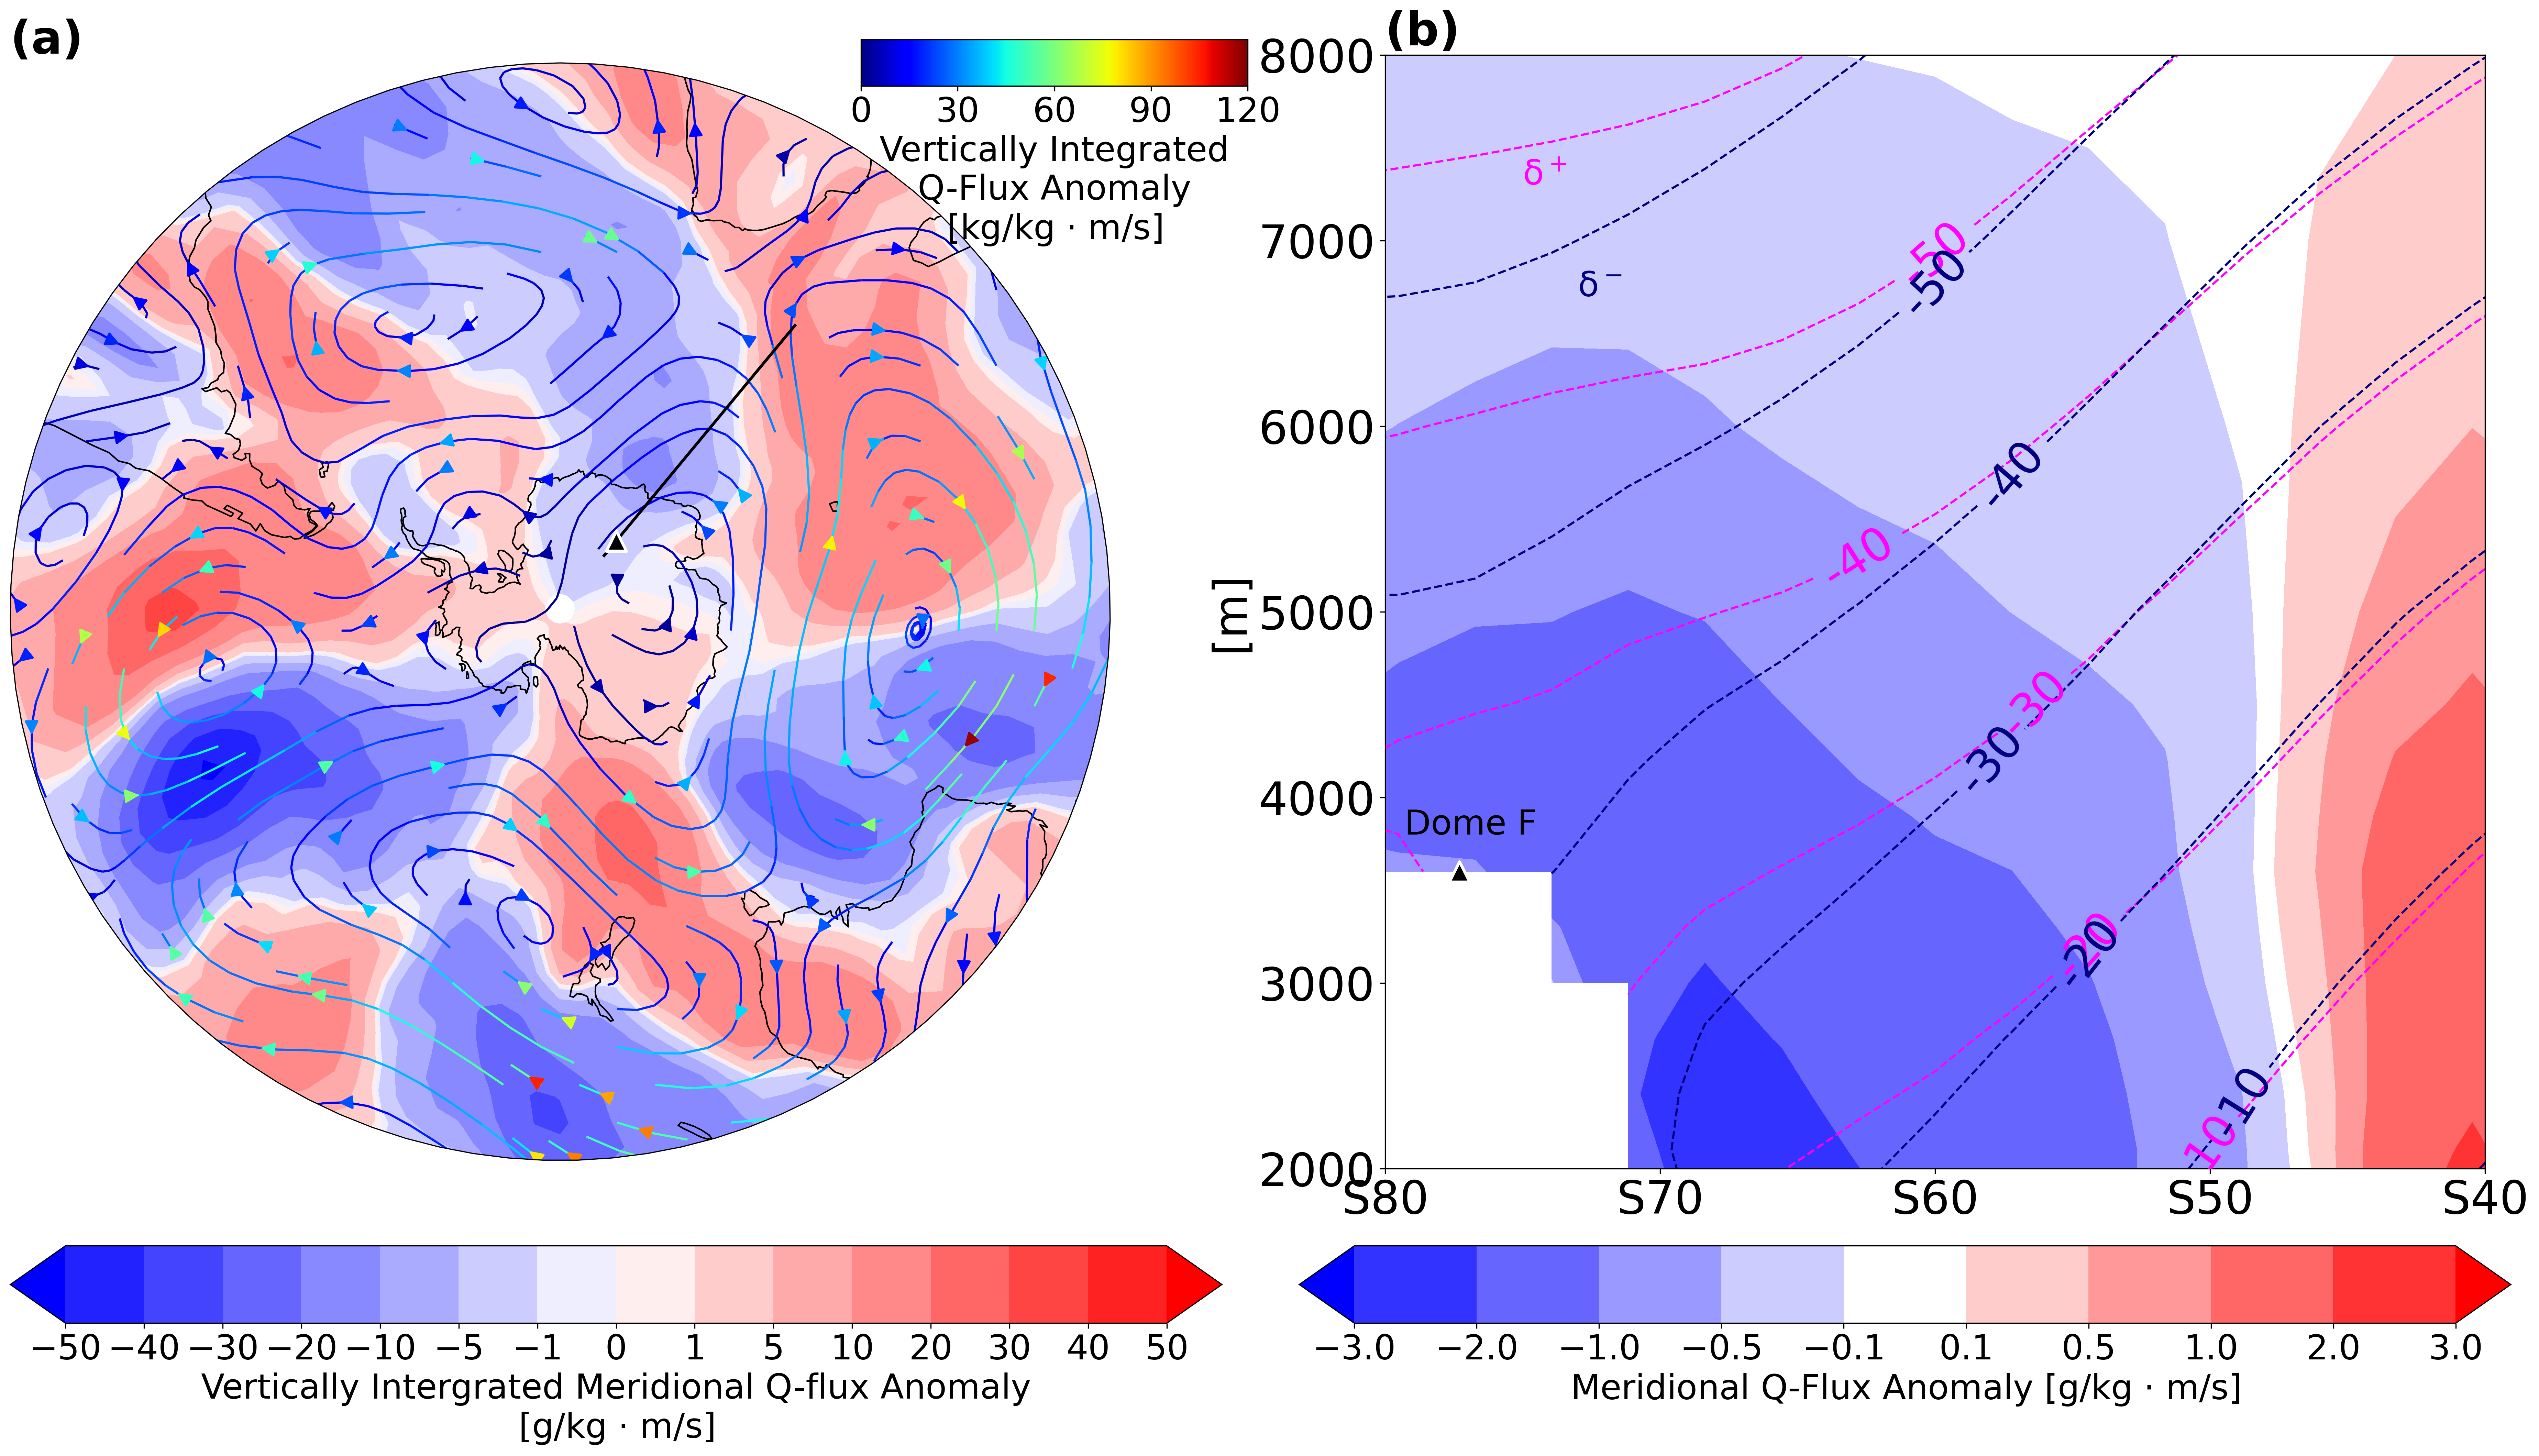

In [31]:
fig = plt.figure(figsize=(25,15))

ax = plt.subplot2grid((1,2), (0, 0), projection=ccrs.SouthPolarStereo())
draw_field2(ax,uprecwJJA_d18Op_p-uprecwJJA_d18Op_m,vprecwJJA_d18Op_p-vprecwJJA_d18Op_m,(vqJJA_d18Op_p_df-vqJJA_d18Op_m_df)*1000, TJJA_d18Op_p_df,TJJA_d18Op_m_df,label1=vprecw_label,levels1=vprecw_levels, cmap1=vprecw_cmap, norm1=vprecw_norm,levels3=vq_levels, cmap3=vq_cmap, norm3=vq_norm)
ax.set_title("(a) " , loc="left",fontsize=32,weight="demibold")


ax = plt.subplot2grid((1,2), (0, 1))
draw_vert2(ax,"",(vqJJA_d18Op_p_df-vqJJA_d18Op_m_df)*1000, TJJA_d18Op_p_df,TJJA_d18Op_m_df,label_p,label_n, label2=vq_label,levels2=vq_levels, cmap2=vq_cmap,norm2=vq_norm,dome_name="Dome F")   
ax.set_title("(b) " , loc="left",fontsize=32,weight="demibold")
plt.subplots_adjust(top=0.92,bottom=0.2,left=0.02,right=0.98,hspace=0.25,wspace=0.25)
fig.show()
fig.savefig("composite_vert_d18O_JJA.png")

Kanon Kino (kanon@aori.u-tokyo.ac.jp)